<a href="https://colab.research.google.com/github/PyBeginner1/TitanicDF/blob/main/TitanicPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [138]:
titanic = pd.read_csv('/content/titanic.txt')

In [139]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [140]:
titanic.shape

(891, 12)

Check for null/missing values

In [141]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [142]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

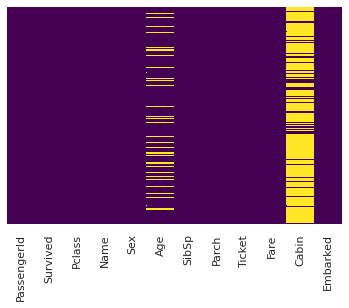

In [143]:
sns.heatmap(titanic.isnull(), cmap = 'viridis', cbar = False, yticklabels = False)

Handling the missing values

Drop the cabin column

In [144]:
titanic = titanic.drop('Cabin', axis = 1)

In [145]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Replacing misssing age values with its mean

In [146]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace = True)

Replacing the missing values in Embarked with most repeated Word in the column

In [147]:
#checking the most repeated word(S,C or Q)
print(titanic['Embarked'].mode())

0    S
dtype: object


In [148]:
print(titanic['Embarked'].mode()[0])

S


In [149]:
#replacing missing values with mode value
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace = True)

Check Missing Values

In [150]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Statistical info about dataset

In [151]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [152]:
titanic['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Data Visualization

In [153]:
sns.set()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


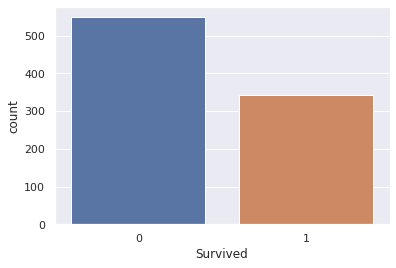

In [154]:
#survival 
sns.countplot('Survived', data = titanic)

In [155]:
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


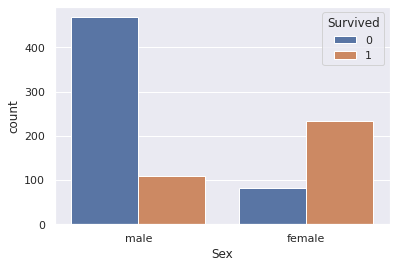

In [156]:
#survival of both gender
sns.countplot('Sex', hue = 'Survived', data = titanic)

In [157]:
titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


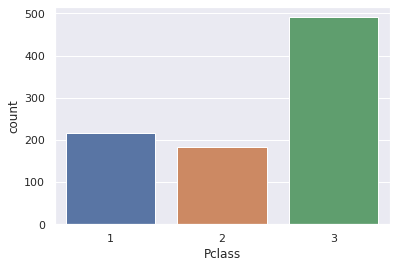

In [158]:
sns.countplot('Pclass', data = titanic)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


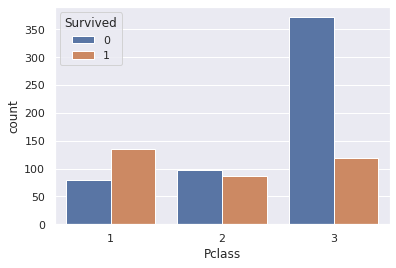

In [159]:
sns.countplot('Pclass', hue = 'Survived', data = titanic)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


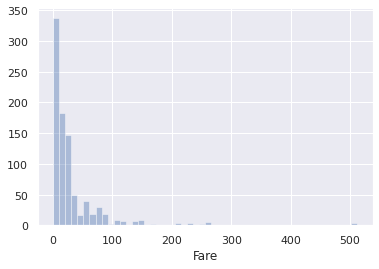

In [160]:
sns.distplot(titanic['Fare'], kde = False)

Data Encoding

Male ---> 0

Female ---> 1

In [161]:
titanic.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)


In [162]:
titanic['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

In [163]:
titanic['Embarked'].value_counts()

0    646
1    168
2     77
Name: Embarked, dtype: int64

In [164]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


Splitting the dataset into data & target

In [165]:
X = titanic.drop(columns=['Name', 'Ticket', 'PassengerId','Embarked','Survived'], axis = 1)
Y = titanic['Survived']

In [166]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare
0         3    0  22.000000      1      0   7.2500
1         1    1  38.000000      1      0  71.2833
2         3    1  26.000000      0      0   7.9250
3         1    1  35.000000      1      0  53.1000
4         3    0  35.000000      0      0   8.0500
..      ...  ...        ...    ...    ...      ...
886       2    0  27.000000      0      0  13.0000
887       1    1  19.000000      0      0  30.0000
888       3    1  29.699118      1      2  23.4500
889       1    0  26.000000      0      0  30.0000
890       3    0  32.000000      0      0   7.7500

[891 rows x 6 columns]


In [167]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


Training & Testing data


In [168]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 2)

In [169]:
print(X.shape, X_train.shape, X_test.shape)

(891, 6) (712, 6) (179, 6)


Model Training

Logistic Regression

In [170]:
model = LogisticRegression()

Training the model

In [171]:
model.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [173]:
train_predict = model.predict(X_train)
score = accuracy_score(train_predict, Y_train)
print('Acuracy score of training model is ',score)


Acuracy score of training model is  0.7991573033707865


Accuracy of testing model

In [174]:
test_predict = model.predict(X_test)
score_1 = accuracy_score(Y_test, test_predict)
print('Accuracy score of testing model is :', score_1)

Accuracy score of testing model is : 0.776536312849162


Making a predictive model

In [177]:
input_data = (3,0,	22.0,	1,	0,7.2500)

#convert to numpy array
input_data_numpy = np.asarray(input_data)

#reshape
input_data_reshape = input_data_numpy.reshape(1, - 1)

predict = model.predict(input_data_reshape)
if predict == 0:
  print('The Person didnt survive')
else:
  print('Person Survived')

The Person didnt survive


Taking for a survived person

In [178]:
input_data = (1,	1,	38.0,	1,	0,71.2833	)

#convert to numpy array
input_data_numpy = np.asarray(input_data)

#reshape
input_data_reshape = input_data_numpy.reshape(1, - 1)

predict = model.predict(input_data_reshape)
if predict == 0:
  print('The Person didnt survive')
else:
  print('Person Survived')

Person Survived
